In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib
import os

In [3]:
dataset = pd.read_csv("dataset.csv")
severity = pd.read_csv("Symptom-severity.csv")

In [4]:
dataset.columns = dataset.columns.str.strip()
severity["Symptom"] = severity["Symptom"].str.strip().str.lower()

In [5]:
severity_dict = dict(zip(severity["Symptom"], severity["weight"]))

In [6]:
symptom_cols = [col for col in dataset.columns if col.startswith("Symptom")]
dataset[symptom_cols] = dataset[symptom_cols].fillna("").applymap(lambda x: x.strip().lower())

C:\Users\Vinith Kumar\AppData\Local\Temp\ipykernel_7828\3276181537.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset[symptom_cols] = dataset[symptom_cols].fillna("").applymap(lambda x: x.strip().lower())


In [7]:
all_symptoms = sorted(set(symptom for col in symptom_cols for symptom in dataset[col] if symptom))
symptom_index = {symptom: idx for idx, symptom in enumerate(all_symptoms)}

In [8]:
def build_vector(symptoms):
    vec = np.zeros(len(symptom_index))
    for symptom in symptoms:
        if symptom in symptom_index and symptom in severity_dict:
            vec[symptom_index[symptom]] = severity_dict[symptom]
    return vec

X = np.array([build_vector(row[symptom_cols]) for _, row in dataset.iterrows()])

In [9]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset["Disease"])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
joblib.dump(model, "model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(symptom_index, "symptom_index.pkl")
joblib.dump(severity_dict, "severity_dict.pkl")

['severity_dict.pkl']

In [13]:
print("Training Accuracy:", model.score(X_train, y_train))

Training Accuracy: 1.0


In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("✅ Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))


✅ Test Accuracy: 1.0

🧾 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00

In [15]:
print(dataset['Disease'].value_counts())

Disease
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hepat

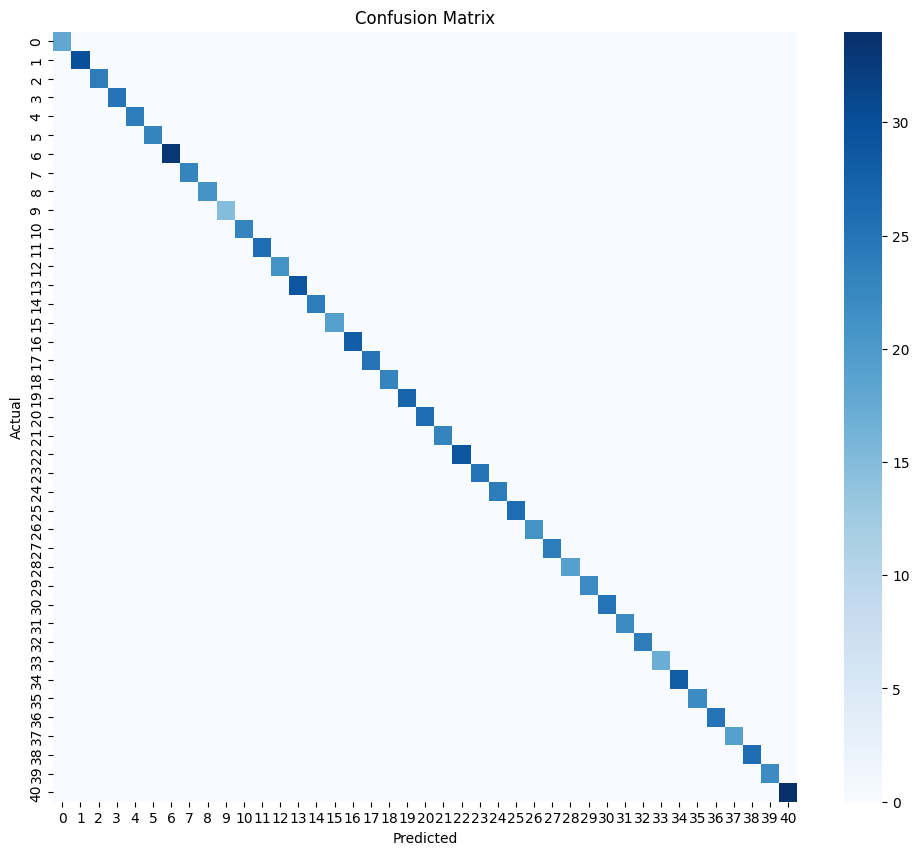

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap='Blues', annot=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [17]:
# Export list of all symptoms for React dropdown
import json

symptom_list = sorted(symptom_index.keys())
with open("symptom_list.json", "w") as f:
    json.dump(symptom_list, f)
